In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression



Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


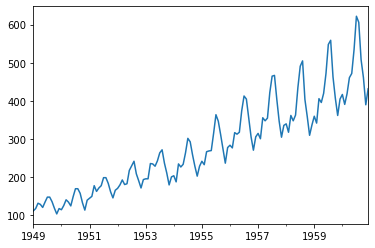

In [4]:
df = sns.load_dataset("flights")
ts = df['year'].astype(str) + " " + df['month'].astype(str)
df.set_index(pd.to_datetime(ts), inplace=True)
df['passengers'].plot()

In [7]:
df['x'] = range(144)
X = df[['x']]
y = df['passengers']


In [8]:
m = LinearRegression()
m.fit(X,y)
m.score(X,y)

0.853638165603188

In [9]:
df['ypred'] = m.predict(X)

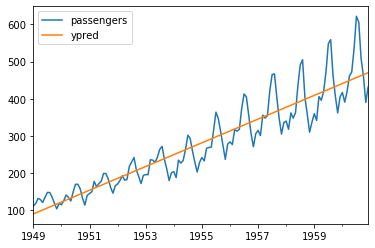

In [10]:
df[['passengers', 'ypred']].plot()

### But! 
We want to predict the future from the past! So X - past number of passengers, y- future number of passengers
$ y_t = a_1y_{t-1} + a_2t_{t-2} + ... + b + \epsilon $

In [11]:
df.head(5)

,year,month,passengers,x,ypred
1949-01-01,1949,January,112,0,90.309962
1949-02-01,1949,February,118,1,92.967146
1949-03-01,1949,March,132,2,95.624330
1949-04-01,1949,April,129,3,98.281513
1949-05-01,1949,May,121,4,100.938697


In [14]:
del df['x']

In [15]:
del df['ypred']

In [33]:
df['t-1'] = df['passengers'].shift(1)
df['t-2'] = df['passengers'].shift(2)
df['t-3'] = df['passengers'].shift(3)

In [34]:
df2 = df.dropna().copy()

In [35]:
X = df2[['t-1', 't-2', 't-3']]

In [36]:
y = df2['passengers']

In [37]:
m = LinearRegression()
m.fit(X,y)
m.score(X, y) 


0.9313942495239849

In [38]:
df2['ypred'] = m.predict(X)

In [40]:
df2.head()

,year,month,passengers,t-1,t-2,t-3,ypred
1949-04-01,1949,April,129,132.0,118.0,112.0,144.374255
1949-05-01,1949,May,121,129.0,132.0,118.0,133.254737
1949-06-01,1949,June,135,121.0,129.0,132.0,127.069982
1949-07-01,1949,July,148,135.0,121.0,129.0,150.074440
1949-08-01,1949,August,148,148.0,135.0,121.0,157.701030


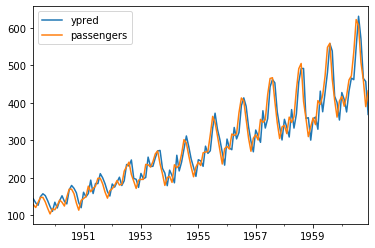

In [41]:
df2[['ypred', 'passengers']].plot()

Order of steps:

 * de-trend, de-season
 * use naive model or AR or LinReg or RandomForesrt model etc
 * make predictions
 * add seasons, trends back in
 

Can look at residuals and see what the histogram looks like!

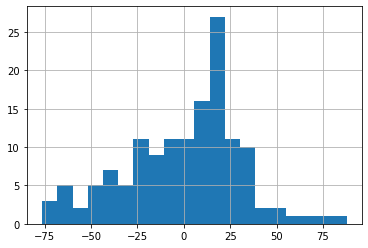

In [42]:
(df2['ypred']-df2['passengers']).hist(bins=20)

This is not a normal distribution, so the linear model is not perfect yet

In [45]:
m.coef_, m.intercept_

(array([ 1.34822859, -0.59184156,  0.2018249 ]), 13.640997093145586)

These coefficients give a good model if we only ever predict one step int the future. If we try and predict more steps, this may look different:


In [46]:
yp = list(df2['passengers'].values[:120])
for i in range(21):
    t1 = yp[-1]
    t2 = yp[-2]
    t3 = yp[-3]
    
    t0 = 1.34822859*t1 + -0.59184156*t2 + 0.2018249*t3 + 13.640997093145586
    yp.append(t0)

In [47]:
df2['multipred'] = yp

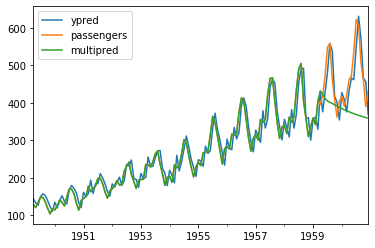

In [48]:
df2[['ypred', 'passengers', 'multipred']].plot()

## This only provides a short-term forecast!!! For longer-term forecasts can use:
* vanilla LinReg (with `df['x'] = range(144)`
* add polynomial /log/exp features
* resample/downsample to a different time delta